In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy

# First vesion of program examined the data file to determine
# what information was available. This step allowed processing
# the file to better format it.
#
# This file was processed to combine changed definitions of rape
# that changed during time data was collected. Also renamed a
# few types of crime to shorten the names for better display.

Colorado_Crime_Data_File = "Resources/CO_crime_processed.csv"

crime_data = pd.read_csv(Colorado_Crime_Data_File)


In [2]:
# Display the number of rows and hearder information provided
crime_data_count = len(crime_data)
print("Crime data record count: ", crime_data_count)
print("Data file columns = ", crime_data.columns.values)

Crime data record count:  121
Data file columns =  ['key' 'id' 'name' 'type' 'variable' 'value' 'year' 'crime_type'
 'place_name']


In [3]:
# The only data needed for plotting is year, crime_type, and value.
# Create a new data frame with this infomation.
# Could also have dropped unwanted columns and kept crime_data dataframe

rate_info = crime_data[['year', 'crime_type', 'value']]

# Use pivot table to create dataframe having row for each year and columns for
# each crime type. The values (crime rate) become data or each cell in the table.

crime_by_year = rate_info.pivot_table(index='year', columns='crime_type', values='value')

# The pivot table operation uses the year as index.
# Perform a reset_index opeation to give a column that is year.
# This will be used to make plots.

crime_by_year = crime_by_year.reset_index()

# Show columns to get list of crime types
print("crime_by_year headers = ", crime_by_year.columns.values)

crime_by_year headers =  ['year' 'Aggravated assault' 'All Crimes' 'Arson' 'Burglary' 'Larceny'
 'MV theft' 'Murder-Manslaughter' 'Property crime' 'Rape' 'Robbery'
 'Violent crime']


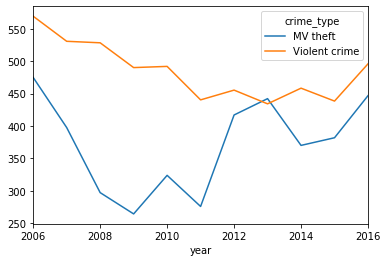

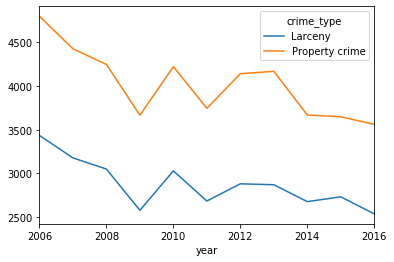

In [4]:
# Plot some itmes with similar values so that they fall on graph
# with same Y axis value
#
# Compare MV theft and Violent crime
# Compare Larceny and Property crime

crime_by_year.plot(x="year", y=["MV theft", "Violent crime"])
plt.show()

crime_by_year.plot(x="year", y=["Larceny", "Property crime"])
plt.show()

In [5]:
# Create a stacked bar chart

# The default function will use the index as the Y axis so we
# want to set this column as the dataframe index.

crime_by_year.set_index('year', inplace=True)

# The data set has an "all crimes" column which will take up most
# of the plot. We need to drop that so having individual crimes will
# make sense in the chart.

crime_by_year.drop('All Crimes', axis=1, inplace=True)

In [6]:
# Sort the order of columns so crimes are arranged largest value
# to smallest value.

# https://stackoverflow.com/questions/12358360/order-columns-of-a-pandas-dataframe-according-to-the-values-in-a-row

sorted_crime_by_year = crime_by_year.sort_values(crime_by_year.last_valid_index(), axis=1, ascending=False)

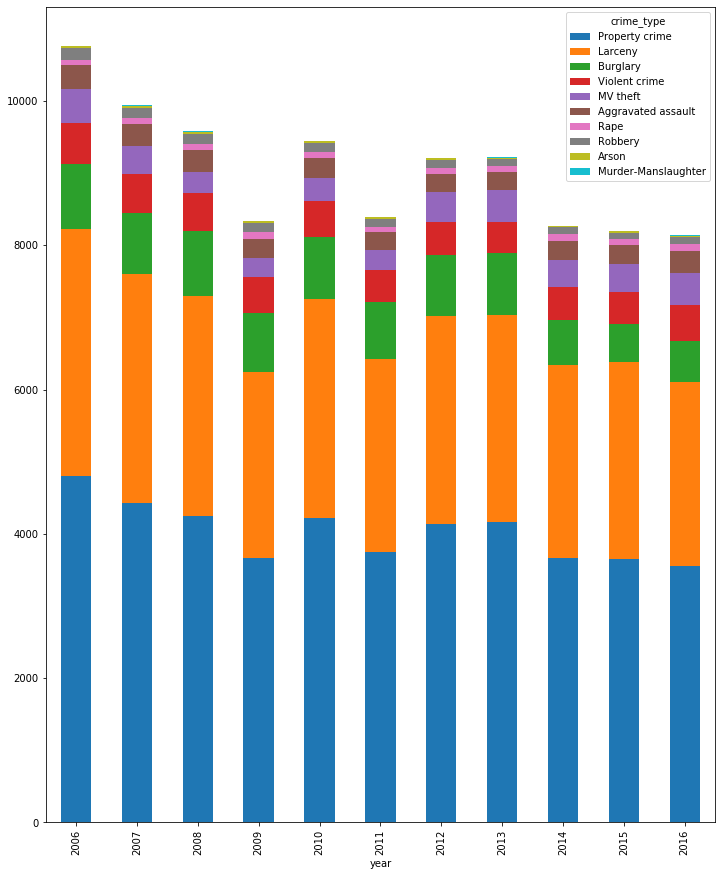

In [7]:
# Create a stacked bar chart

sorted_crime_by_year.plot.bar(stacked=True, figsize=(12,15))

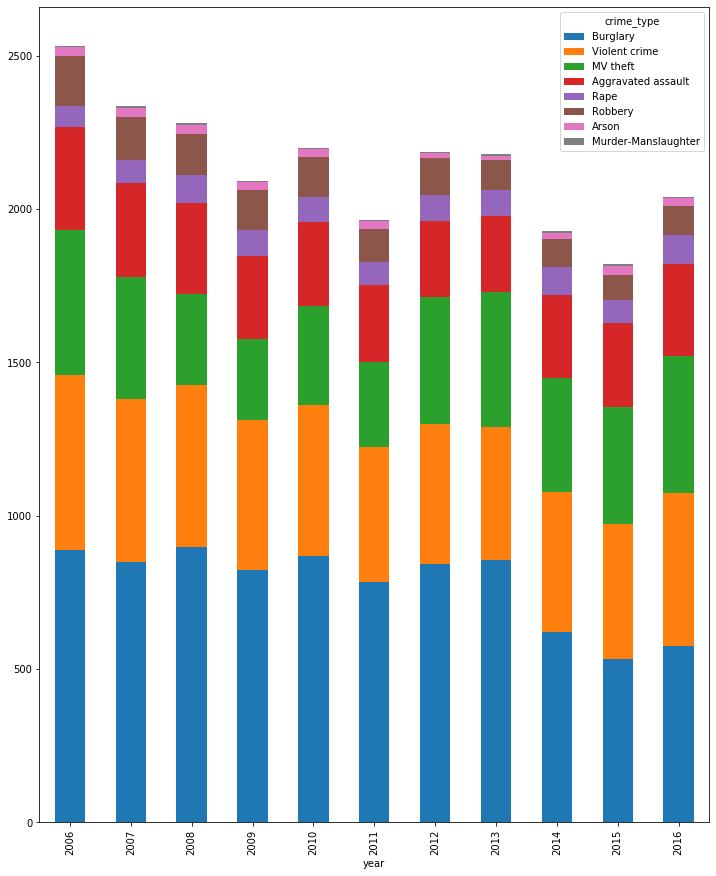

In [8]:
# The size of property crime and lareny overshadow all other
# crimes. Drop those and see how the chart looks.

sorted_crime_by_year.drop('Property crime', axis=1, inplace=True)
sorted_crime_by_year.drop('Larceny', axis=1, inplace=True)

sorted_crime_by_year.plot.bar(stacked=True, figsize=(12,15))